In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster 

In [2]:
derecho_911 = pd.read_csv('../data/911_Phone Calls_Derecho_050320 050420.csv')

In [3]:
derecho_911.head(5)

Seizure DateTime CallTypeId  ALI Latitude  ALI Longitude  \
0   5/3/2020 16:30  911 Calls     36.247802     -86.716847   
1   5/3/2020 16:30  911 Calls     36.143108     -86.800621   
2   5/3/2020 16:30  911 Calls     36.100516     -87.056329   
3   5/3/2020 16:30  911 Calls     36.130021     -86.927819   
4   5/3/2020 16:31  911 Calls     36.142380     -86.881882   

      Cell Tower Address  
0        WIRELESS CALLER  
1    1161 21ST AV S - SE  
2  8013 C MCCRORY LN - N  
3     5758 RIVER RD - SW  
4   3744B ANNEX AVE - SE

In [4]:
derecho_911.tail(5)

Seizure DateTime CallTypeId  ALI Latitude  ALI Longitude  \
1544    5/4/2020 0:18  911 Calls     36.131694     -86.770535   
1545    5/4/2020 0:22  911 Calls     36.042237     -86.743455   
1546    5/4/2020 0:25  911 Calls     36.077664     -86.655607   
1547    5/4/2020 0:29  911 Calls     36.024706     -86.743562   
1548    5/4/2020 0:29  911 Calls           NaN            NaN   

                       Cell Tower Address  
1544         1823-C 12TH AV - SECTOR SE S  
1545     5244-C EDMONSON PIKE - SECTOR SE  
1546  2747-B MURFREESBORO PKE - SECTOR NW  
1547               302 SUMMIT VIEW DR - E  
1548                2014 QUAIL HOLLOW CIR

In [5]:
derecho_911.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Seizure DateTime    1549 non-null   object 
 1   CallTypeId          1549 non-null   object 
 2   ALI Latitude        1483 non-null   float64
 3   ALI Longitude       1483 non-null   float64
 4   Cell Tower Address  1525 non-null   object 
dtypes: float64(2), object(3)
memory usage: 60.6+ KB


In [6]:
 derecho_911.isnull().sum()

Seizure DateTime       0
CallTypeId             0
ALI Latitude          66
ALI Longitude         66
Cell Tower Address    24
dtype: int64

In [7]:
derecho_911.shape

(1549, 5)

In [8]:
#skiprows can ignore the first few rows fixing parsing issues
derecho_dispatch = pd.read_csv('../data/Computer Aided Dispatch Data_Derecho Incidents 050320-050420.csv', skiprows=2)

In [9]:
derecho_dispatch.head(10)

IncidentDate                         Location  Latitude1  \
0  5/3/2020 4:31:07 PM                 901 KENWICK CT W  36.046877   
1  5/3/2020 4:32:18 PM                    8036 ARBOR DR  36.082491   
2  5/3/2020 4:32:23 PM                119 DUE WEST AV E  36.248029   
3  5/3/2020 4:33:04 PM               630 GALLATIN PKE S  36.256491   
4  5/3/2020 4:33:52 PM                615 W HILLWOOD DR  36.129690   
5  5/3/2020 4:33:53 PM              622 BROOK HOLLOW RD  36.111773   
6  5/3/2020 4:34:19 PM  JOCELYN HOLLOW RD / BRESSLYN RD  36.103318   
7  5/3/2020 4:35:01 PM           WOODLAND ST / S 7TH ST  36.173583   
8  5/3/2020 4:36:42 PM                  3000 POSTON AV   36.145332   
9  5/3/2020 4:37:04 PM      51ST AV N / CENTENNIAL BLVD  36.162326   

   Longitude1                       IncidentTypeDescription1  
0  -86.962526                              ELECTRICAL HAZARD  
1  -86.940680                              ELECTRICAL HAZARD  
2  -86.716875                                 NOT ALERT COPD  
3  -86.714817                                 ABDOMINAL PAIN  
4  -86.879834                              ELECTRICAL HAZARD  
5  -86.888087                              ELECTRICAL HAZARD  
6  -86.898080                              ELECTRICAL HAZARD  
7  -86.760339  SEIZURE: EFFECTIVE BREATHING NOT VERIFIED >35  
8  -86.815356    GENERAL ALARM COMMERCIAL   INDUSTRIAL BUILD  
9  -86.849144                              ELECTRICAL HAZARD

In [10]:
derecho_dispatch.tail(5)

IncidentDate          Location  Latitude1  Longitude1  \
622  5/4/2020 12:21:00 AM     625 BENTON AV  36.131384  -86.770628   
623  5/4/2020 12:21:32 AM  518 BRENTLAWN DR  36.064362  -86.761199   
624  5/4/2020 12:22:47 AM     517 ALBANY DR  36.212754  -86.600431   
625  5/4/2020 12:27:52 AM  639 LAFAYETTE ST  36.153769  -86.777520   
626  5/4/2020 12:29:50 AM    2011 HAYES ST   36.151839  -86.800791   

                             IncidentTypeDescription1  
622                        HIGH RISE NATURAL GAS ODOR  
623                                    UNKNOWN STATUS  
624                                 ELECTRICAL HAZARD  
625                 SICK PERSON: NO PRIORITY SYMPTOMS  
626  PULL STATION ALARM COMMERCIAL   INDUSTRIAL BUILD

In [11]:
derecho_dispatch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   IncidentDate              627 non-null    object 
 1   Location                  627 non-null    object 
 2   Latitude1                 627 non-null    float64
 3   Longitude1                627 non-null    float64
 4   IncidentTypeDescription1  627 non-null    object 
dtypes: float64(2), object(3)
memory usage: 24.6+ KB


In [12]:
derecho_dispatch.shape

(627, 5)

In [13]:
tornado_911 = pd.read_csv('../data/911_Phone_Calls_Tornado_030320.csv')

In [14]:
tornado_911.head(5)

Seizure DateTime CallTypeId  ALI Latitude  ALI Longitude  \
0    3/3/2020 0:34  911 Calls     36.072708     -86.665779   
1    3/3/2020 0:36  911 Calls     36.159634     -86.841904   
2    3/3/2020 0:36  911 Calls     36.264153     -86.708862   
3    3/3/2020 0:36  911 Calls           NaN            NaN   
4    3/3/2020 0:36  911 Calls     36.233467     -86.721077   

           Cell Tower Address  
0  620 Richards RD - N Sector  
1      4507D KENTUCKY AV - SE  
2    329 THELMA ST - S Sector  
3              526 FOUNDRY DR  
4        5007B RUSKIN AVE - N

In [15]:
tornado_911.tail(5)

Seizure DateTime CallTypeId  ALI Latitude  ALI Longitude  \
470    3/3/2020 4:54  911 Calls     36.142552     -86.635330   
471    3/3/2020 4:54  911 Calls     36.189415     -86.813557   
472    3/3/2020 4:55  911 Calls     36.223534     -86.757874   
473    3/3/2020 4:56  911 Calls     36.168398     -86.783774   
474    3/3/2020 4:58  911 Calls     36.276566     -86.799417   

                    Cell Tower Address  
470                    WIRELESS CALLER  
471                    WIRELESS CALLER  
472                    WIRELESS CALLER  
473  600 DR MARTIN L KING JR BLVD - NE  
474             4884 LICKTON PIKE - SE

In [16]:
tornado_911.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Seizure DateTime    475 non-null    object 
 1   CallTypeId          475 non-null    object 
 2   ALI Latitude        450 non-null    float64
 3   ALI Longitude       450 non-null    float64
 4   Cell Tower Address  468 non-null    object 
dtypes: float64(2), object(3)
memory usage: 18.7+ KB


In [17]:
tornado_911.shape

(475, 5)

In [18]:
 tornado_911.isnull().sum()

Seizure DateTime       0
CallTypeId             0
ALI Latitude          25
ALI Longitude         25
Cell Tower Address     7
dtype: int64

In [19]:
tornado_dispatch = pd.read_csv('../data/Computer Aided Dispatch Data_Tornado Incidents 030320.csv', skiprows=2)


In [20]:
tornado_dispatch.head(10)

IncidentDate                   Location  Latitude1  Longitude1  \
0  3/3/2020 12:36:34 AM    6205 COCKRILL BEND CIR   36.182002  -86.894052   
1  3/3/2020 12:37:24 AM   7337 COCKRILL BEND BLVD   36.175666  -86.894978   
2  3/3/2020 12:38:17 AM       110 TUNE AIRPORT DR   36.179299  -86.883727   
3  3/3/2020 12:39:40 AM           555 MARRIOTT DR   36.151108  -86.689921   
4  3/3/2020 12:39:42 AM   1414 COUNTY HOSPITAL RD   36.177926  -86.845934   
5  3/3/2020 12:40:11 AM   1406 COUNTY HOSPITAL RD   36.178264  -86.850464   
6  3/3/2020 12:41:31 AM              920 BROADWAY   36.158347  -86.784207   
7  3/3/2020 12:42:30 AM             518 MONROE ST   36.176519  -86.790233   
8  3/3/2020 12:42:51 AM  1625 DR D B TODD JR BLVD   36.175630  -86.809654   
9  3/3/2020 12:42:51 AM  1625 DR D B TODD JR BLVD   36.175630  -86.809654   

                      IncidentTypeDescription1  
0  GENERAL ALARM COMMERCIAL   INDUSTRIAL BUILD  
1  GENERAL ALARM COMMERCIAL   INDUSTRIAL BUILD  
2       STRUCTURE FIRE COMMERCIAL   INDUSTRIAL  
3  GENERAL ALARM COMMERCIAL   INDUSTRIAL BUILD  
4  GENERAL ALARM COMMERCIAL   INDUSTRIAL BUILD  
5  GENERAL ALARM COMMERCIAL   INDUSTRIAL BUILD  
6  GENERAL ALARM COMMERCIAL   INDUSTRIAL BUILD  
7  GENERAL ALARM COMMERCIAL   INDUSTRIAL BUILD  
8  GENERAL ALARM COMMERCIAL   INDUSTRIAL BUILD  
9  GENERAL ALARM COMMERCIAL   INDUSTRIAL BUILD

In [21]:
tornado_dispatch.tail(5)

IncidentDate                     Location  Latitude1  Longitude1  \
255  3/3/2020 4:53:43 AM               1616 23RD AV N  36.175739  -86.813173   
256  3/3/2020 4:56:56 AM        5610 OLD HICKORY BLVD  36.180487  -86.601466   
257  3/3/2020 4:57:06 AM          2903 MORNINGSIDE DR  36.223554  -86.757949   
258  3/3/2020 4:57:14 AM               1730 KELLOW ST  36.189445  -86.813466   
259  3/3/2020 4:57:48 AM  I24 W / HICKORY HOLLOW PKWY  36.039720  -86.649099   

                              IncidentTypeDescription1  
255  WIRES DOWN WITH NO SMOKE OR ARCING POWER DISCO...  
256                       LARGE BUILDING INVESTIGATION  
257                    CHEST PAIN - ABNORMAL BREATHING  
258             ABNORMAL BREATHING OTHER LUNG PROBLEMS  
259                                    UNKNOWN STATUS:

In [22]:
tornado_dispatch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   IncidentDate              260 non-null    object 
 1   Location                  260 non-null    object 
 2   Latitude1                 260 non-null    float64
 3   Longitude1                260 non-null    float64
 4   IncidentTypeDescription1  260 non-null    object 
dtypes: float64(2), object(3)
memory usage: 10.3+ KB


A timeline of Derecho Beginning and end of the event Times of stronger storm impacts, based on call volumes
- every 30 mins

In [23]:
print(derecho_911.dtypes)

Seizure DateTime       object
CallTypeId             object
ALI Latitude          float64
ALI Longitude         float64
Cell Tower Address     object
dtype: object


In [24]:
derecho_911['Seizure DateTime'] = pd.to_datetime(derecho_911['Seizure DateTime'])
derecho_911.resample('15min', on='Seizure DateTime').CallTypeId.count()

Seizure DateTime
2020-05-03 16:30:00     73
2020-05-03 16:45:00     69
2020-05-03 17:00:00     67
2020-05-03 17:15:00     63
2020-05-03 17:30:00     67
2020-05-03 17:45:00     85
2020-05-03 18:00:00     70
2020-05-03 18:15:00     85
2020-05-03 18:30:00     84
2020-05-03 18:45:00    112
2020-05-03 19:00:00     71
2020-05-03 19:15:00     82
2020-05-03 19:30:00     56
2020-05-03 19:45:00     58
2020-05-03 20:00:00     54
2020-05-03 20:15:00     58
2020-05-03 20:30:00     37
2020-05-03 20:45:00     40
2020-05-03 21:00:00     34
2020-05-03 21:15:00     32
2020-05-03 21:30:00     29
2020-05-03 21:45:00     27
2020-05-03 22:00:00     27
2020-05-03 22:15:00     51
2020-05-03 22:30:00     31
2020-05-03 22:45:00     22
2020-05-03 23:00:00     14
2020-05-03 23:15:00     11
2020-05-03 23:30:00     10
2020-05-03 23:45:00     13
2020-05-04 00:00:00      9
2020-05-04 00:15:00      8
Freq: 15T, Name: CallTypeId, dtype: int64

Geospatial map of derecho impact based on call volume 
- plot geographic path

In [25]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head()

epsg:4326


zip objectid    po_name      shape_stlength        shape_starea  \
0  37115        1    MADISON  178783.02488886821  596553400.57885742   
1  37216        3  NASHVILLE  75820.997821400058  188884682.28344727   
2  37204        9  NASHVILLE  93180.292250425613  200664795.51708984   
3  37027       11  BRENTWOOD   159760.6942933173  174978422.04101562   
4  37064       18   FRANKLIN  28995.828320601937  46969608.005737305   

                                            geometry  
0  MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ...  
1  MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ...  
2  MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ...  
3  MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ...  
4  MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ...

In [26]:
derecho_911.head(5)

Seizure DateTime CallTypeId  ALI Latitude  ALI Longitude  \
0 2020-05-03 16:30:00  911 Calls     36.247802     -86.716847   
1 2020-05-03 16:30:00  911 Calls     36.143108     -86.800621   
2 2020-05-03 16:30:00  911 Calls     36.100516     -87.056329   
3 2020-05-03 16:30:00  911 Calls     36.130021     -86.927819   
4 2020-05-03 16:31:00  911 Calls     36.142380     -86.881882   

      Cell Tower Address  
0        WIRELESS CALLER  
1    1161 21ST AV S - SE  
2  8013 C MCCRORY LN - N  
3     5758 RIVER RD - SW  
4   3744B ANNEX AVE - SE

In [27]:
derecho_911.columns = ['date','CallTypeId','lat','lon','address']

In [28]:
derecho_911['geometry'] = derecho_911.apply(lambda x: Point((float(x.lon), ##x here is to go through rows to apply the func.
                                                         float(x.lat))), 
                                        axis=1)
derecho_911.head(3)

date CallTypeId        lat        lon                address  \
0 2020-05-03 16:30:00  911 Calls  36.247802 -86.716847        WIRELESS CALLER   
1 2020-05-03 16:30:00  911 Calls  36.143108 -86.800621    1161 21ST AV S - SE   
2 2020-05-03 16:30:00  911 Calls  36.100516 -87.056329  8013 C MCCRORY LN - N   

                                       geometry  
0                  POINT (-86.716847 36.247802)  
1  POINT (-86.80062099999999 36.14310800000001)  
2          POINT (-87.05632900000001 36.100516)

In [29]:
derecho_911.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1549 non-null   datetime64[ns]
 1   CallTypeId  1549 non-null   object        
 2   lat         1483 non-null   float64       
 3   lon         1483 non-null   float64       
 4   address     1525 non-null   object        
 5   geometry    1549 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 72.7+ KB


In [30]:

zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [31]:
derecho_geo = gpd.GeoDataFrame(derecho_911, 
                           crs = zipcodes.crs, ## make a match
                           geometry = derecho_911['geometry'])

In [32]:
type(derecho_geo)

geopandas.geodataframe.GeoDataFrame

In [33]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [34]:
calls_by_zip = gpd.sjoin(derecho_geo, zipcodes, op = 'within')

In [35]:
calls_by_zip.head(5)

date CallTypeId        lat        lon  \
0   2020-05-03 16:30:00  911 Calls  36.247802 -86.716847   
68  2020-05-03 16:44:00  911 Calls  36.265547 -86.736116   
78  2020-05-03 16:46:00  911 Calls  36.250710 -86.689766   
79  2020-05-03 16:46:00  911 Calls  36.259485 -86.678717   
100 2020-05-03 16:51:00  911 Calls  36.253467 -86.730366   

                             address                    geometry  index_right  \
0                    WIRELESS CALLER  POINT (-86.71685 36.24780)            0   
68         524 BOYDS HILLTOP DR - SW  POINT (-86.73612 36.26555)            0   
78       607E LARKIN SPRINGS RD - SW  POINT (-86.68977 36.25071)            0   
79       96 D VANDIVER DR - SECTOR S  POINT (-86.67872 36.25948)            0   
100  619 DUE WEST AVE. W - NE SECTOR  POINT (-86.73037 36.25347)            0   

       zip  po_name  
0    37115  MADISON  
68   37115  MADISON  
78   37115  MADISON  
79   37115  MADISON  
100  37115  MADISON

In [36]:
calls_by_zip['zip'].value_counts()

37211    194
37013    191
37076    123
37205    100
37214     89
37217     73
37215     71
37209     68
37204     58
37207     55
37115     52
37210     51
37221     43
37220     39
37212     38
37203     33
37208     29
37206     27
37216     20
37027     20
37138     18
37218     10
37189      6
37080      4
37072      3
37219      3
37232      3
37213      2
37201      1
37122      1
Name: zip, dtype: int64

In [37]:
calls_by_zip.shape

(1425, 9)

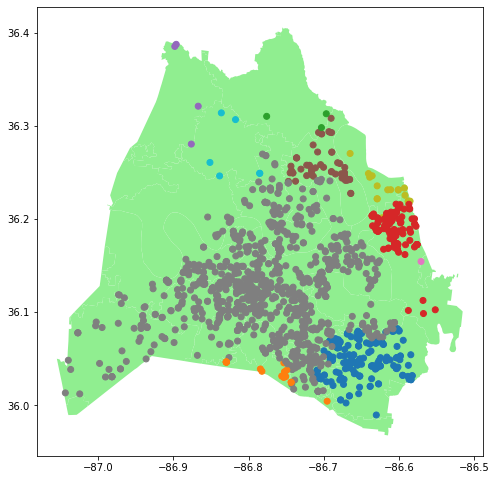

In [38]:
ax = zipcodes.plot(figsize = (8, 10), color = 'lightgreen')
calls_by_zip.plot( ax = ax, column = 'po_name');
plt.show();

In [39]:
center = zipcodes.geometry.centroid[42]
print(center)

POINT (-86.77676762469858 36.23245257407244)


<ipython-input-39-2580bfdf1019>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = zipcodes.geometry.centroid[42]


In [40]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.23245257407244, -86.77676762469858]


In [41]:
map = folium.Map(location =  area_center,zoom_start = 12)
map

In [42]:
i = 0
for row_index, row_values in calls_by_zip.iterrows():  ##useful to builder pop-up markers
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 0
values are:
 
date                    2020-05-03 16:30:00
CallTypeId                        911 Calls
lat                                 36.2478
lon                                -86.7168
address                     WIRELESS CALLER
geometry       POINT (-86.716847 36.247802)
index_right                               0
zip                                   37115
po_name                             MADISON
Name: 0, dtype: object
------------------------- 
index is 68
values are:
 
date                            2020-05-03 16:44:00
CallTypeId                                911 Calls
lat                                         36.2655
lon                                        -86.7361
address                   524 BOYDS HILLTOP DR - SW
geometry       POINT (-86.73611600000001 36.265547)
index_right                                       0
zip                                           37115
po_name                                     MADISON
Name: 68, dtype: object
-----------

In [43]:

#draw our zip code area: 37207
map = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(zipcodes).add_to(map) ##put our geodataframe onto the map

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in calls_by_zip.iterrows():
    loc = [row_values['lat'], row_values['lon']]
    pop = str(row_values['po_name'])
    marker = folium.Marker(
        location = loc, 
        popup = pop) 
    
    marker.add_to(map)
map.save('../maps/map.html')  #save your map as an interactive map

#display our map
map

In [44]:
folium.Map?

In [ ]:

cluster_map = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map)

folium.GeoJson(zipcodes).add_to(cluster_map)

# inside the loop add each markwe to the cluster
for row_index, row_values in calls_by_zip.iterrows():
    loc = [row_values['lat'], row_values['lon']]
    pop = str(row_values['po_name'])
    marker = folium.Marker(
        location = loc, 
        popup = pop) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map.save('../maps/cluster.html')

cluster_map

In [ ]:
# after you manipulate your dataframe you can save it to a csv file -->df.to_csv('file1.csv') 
calls_by_zip.to_csv('calls_by_zip_derecho.csv')